# Limpeza de dados e estatística descritiva

Neste desafio, iremos revisar alguns conceitos vistos nas aulas e ver algumas novidades. Os dados originais são do [repositório de dados eleitorais do Tribunal Superior Eleitoral](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1). 

O CSV disponibilizado é formado pela conjunção de algumas tabelas do arquivo [orgao_partidario.zip](https://cdn.tse.jus.br/estatistica/sead/odsele/orgao_partidario/orgao_partidario.zip), localizado no menu Partidos > Órgão Partidário.

Preencha as lacunas abaixo para completar o desafio.

# Importe os pacotes necessários

In [16]:
import pandas as pd
import numpy as np

# Leia o arquivo "receitas_orgaos_partidarios_2020_NORDESTE.csv" usando o Pandas

Na aula `1.10 - Outliers e valores faltantes`, vimos como utilizar o método `replace` para substituir valores em certos colunas do nosso dataframe e trocar o texto (string) `#NULO#` pela representação padrão do Pandas para valores nulos.

Aqui, vamos utilizar um outro método, onde definimos quais strings serão considerados valores nulos já na importação do arquivo.

Edite as células abaixo e inclua:

* O nome do arquivo que queremos importar
* O separador utilizado
* Insira uma lista no parâmetro `na_values` que contenha o texto a ser ignorado.

Experimente rodar os comandos primeiro sem e depois com o parâmetro `na_values`, então, compare a diferença. Observe, por exemplo, o campo `CD_CNAE_DOADOR`.

In [17]:
df = pd.read_csv('receitas_orgaos_partidarios_2020_NORDESTE.csv',sep=';')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12874 entries, 0 to 12873
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   DT_GERACAO                   12874 non-null  object
 1   HH_GERACAO                   12874 non-null  object
 2   ANO_ELEICAO                  12874 non-null  int64 
 3   CD_TIPO_ELEICAO              12874 non-null  int64 
 4   NM_TIPO_ELEICAO              12874 non-null  object
 5   TP_PRESTACAO_CONTAS          12874 non-null  object
 6   DT_PRESTACAO_CONTAS          12874 non-null  object
 7   SQ_PRESTADOR_CONTAS          12874 non-null  int64 
 8   CD_ESFERA_PARTIDARIA         12874 non-null  object
 9   DS_ESFERA_PARTIDARIA         12874 non-null  object
 10  SG_UF                        12874 non-null  object
 11  CD_MUNICIPIO                 12874 non-null  int64 
 12  NM_MUNICIPIO                 12874 non-null  object
 13  NR_CNPJ_PRESTADOR_CONTA      12

In [18]:
df = pd.read_csv('receitas_orgaos_partidarios_2020_NORDESTE.csv',sep=';',na_values='#NULO#')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12874 entries, 0 to 12873
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   DT_GERACAO                   12874 non-null  object
 1   HH_GERACAO                   12874 non-null  object
 2   ANO_ELEICAO                  12874 non-null  int64 
 3   CD_TIPO_ELEICAO              12874 non-null  int64 
 4   NM_TIPO_ELEICAO              12874 non-null  object
 5   TP_PRESTACAO_CONTAS          12874 non-null  object
 6   DT_PRESTACAO_CONTAS          12874 non-null  object
 7   SQ_PRESTADOR_CONTAS          12874 non-null  int64 
 8   CD_ESFERA_PARTIDARIA         12874 non-null  object
 9   DS_ESFERA_PARTIDARIA         12874 non-null  object
 10  SG_UF                        12874 non-null  object
 11  CD_MUNICIPIO                 12874 non-null  int64 
 12  NM_MUNICIPIO                 11606 non-null  object
 13  NR_CNPJ_PRESTADOR_CONTA      12

# Filtre apenas os registros que sejam da prestação de contas final


In [19]:
# Primeiro vamos ver os valores únicos da coluna TP_PRESTACAO_CONTAS

df['TP_PRESTACAO_CONTAS'].unique()

array(['Final', 'Relatório Financeiro', 'Parcial',
       'Regularização da Omissão'], dtype=object)

In [20]:
# O resultado deste comando nos diz que quantas linhas e colunas temos antes do filtro
df.shape

(12874, 48)

In [49]:
# Preencha o campo os espaços abaixo com o nome da coluna e o valor desejado para nosso filtro
df_final = df[df['TP_PRESTACAO_CONTAS'] == 'Final'].copy()


In [50]:
# Rode o comando shape no novo dataframe criado e confira se o número de linhas foi reduzido
df_final.shape
print(df_final)



       DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_TIPO_ELEICAO NM_TIPO_ELEICAO  \
0      22/07/2021   23:25:00         2020                2       Ordinária   
1      22/07/2021   23:25:00         2020                2       Ordinária   
2      22/07/2021   23:25:00         2020                2       Ordinária   
3      22/07/2021   23:25:00         2020                2       Ordinária   
4      22/07/2021   23:25:00         2020                2       Ordinária   
...           ...        ...          ...              ...             ...   
12869  22/07/2021   23:25:00         2020                2       Ordinária   
12870  22/07/2021   23:25:00         2020                2       Ordinária   
12871  22/07/2021   23:25:00         2020                2       Ordinária   
12872  22/07/2021   23:25:00         2020                2       Ordinária   
12873  22/07/2021   23:25:00         2020                2       Ordinária   

      TP_PRESTACAO_CONTAS DT_PRESTACAO_CONTAS  SQ_PRESTADOR_CON

## Qual foi a maior doação de pessoa física e pessoa jurídica em cada estado?

Vamos usar o método `value_counts` para não só listar cada valor único da coluna `CD_CNAE_DOADOR`, como também mostrar quantos registros temos em cada um.

In [51]:
# Preencha o nome da coluna abaixo
df_final['CD_CNAE_DOADOR'].value_counts()

-1        6509
 94928    5735
 94308      37
 14126       3
 62023       1
 17311       1
 84116       1
 94995       1
Name: CD_CNAE_DOADOR, dtype: int64

In [52]:
# Para ver os resultados em percentuais é fácil! Basta falarmos para o value_counts que queremos os resultados normalizados
df_final['CD_CNAE_DOADOR'].value_counts(normalize=True)

-1        0.529704
 94928    0.466715
 94308    0.003011
 14126    0.000244
 62023    0.000081
 17311    0.000081
 84116    0.000081
 94995    0.000081
Name: CD_CNAE_DOADOR, dtype: float64

Se o doador for pessoa jurídica, temos seu respectivo código CNAE. Se for pessoa física, então temos o valor `-1`. 

Qual conclusão podemos tirar a respeito dos comandos acima?

Escreva um **comentário** na célula abaixo com a resposta.

In [53]:
# Mais de 50 por cento das doações vieram de pessoas físicas

Agora, vamos duplicar a coluna `CD_CNAE_DOADOR` e deixar esta nova coluna apenas com 2 categorias: física (representada pelo valor -1) ou jurídica (que vamos representar inicialmente com 1).

In [54]:
# Vamos criar uma nova coluna que seja uma cópia exata da coluna CD_CNAE_DOADOR
df_final['TIPO_DOADOR'] = df_final['CD_CNAE_DOADOR']
df_final.shape

(12288, 49)

## Substituição condicional (conditional replacing)

Agora, vamos usar o método where do pacote NumPy (carinhosamente chamado de np abaixo).

Esta função recebe três parâmetros:

* Uma condição: no nosso caso, queremos que filtrar as coluna do CNAE onde os valores sejam -1
* Um valor: caso a condição acima seja verdadeira, qual valor deverá ser retornado?
* Outro valor: se a condição for falsa, então, qual outro valor deverá ser retornado?


In [55]:
df_final['TIPO_DOADOR'] = np.where(df_final['CD_CNAE_DOADOR']==-1, 'fisica', 'juridica')
print(df_final['CD_CNAE_DOADOR'],df_final['TIPO_DOADOR'])

0           -1
1           -1
2        94928
3        94928
4        94928
         ...  
12869    94928
12870       -1
12871    94928
12872       -1
12873    94928
Name: CD_CNAE_DOADOR, Length: 12288, dtype: int64 0          fisica
1          fisica
2        juridica
3        juridica
4        juridica
           ...   
12869    juridica
12870      fisica
12871    juridica
12872      fisica
12873    juridica
Name: TIPO_DOADOR, Length: 12288, dtype: object


## Agrupando (group by)

In [56]:
df_final.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,CD_ESFERA_PARTIDARIA,DS_ESFERA_PARTIDARIA,...,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA,TIPO_DOADOR
0,22/07/2021,23:25:00,2020,2,Ordinária,Final,14/12/2020,1220401248,M,Municipal,...,-1,NaN,NaN,P15000411452PI000005A,NaN,18729827,29/09/2020,LOC. DE IMOVEL P/ FUNCION. DE COMITE ELEITORAL...,1500,fisica
1,22/07/2021,23:25:00,2020,2,Ordinária,Final,08/03/2021,1364490302,M,Municipal,...,-1,NaN,NaN,P15000412165PI000002A,NaN,19789208,27/09/2020,CESSÃO DE SERVIÇOS DE ASSESSORIA E CONSULTORIA...,1500,fisica
2,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P17000412661PI000004A,001,19413470,08/12/2020,NaN,2,juridica
3,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P17000412661PI000001A,850020,19413467,21/10/2020,NaN,14000,juridica
4,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405081,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P40000412564PI000001A,850007,19352758,09/10/2020,NaN,28000,juridica


In [57]:
# Preencha abaixo primeiro uma lista com as 3 colunas que precisamos utilizar para responder à pergunta. E depois o nome das 2 colunas que precisamos agrupar.

df_final[['SG_UF','TIPO_DOADOR','VR_RECEITA']].groupby(by=['SG_UF','TIPO_DOADOR']).max()

VR_RECEITA
SG_UF TIPO_DOADOR            
AL    fisica            17665
      juridica        3900000
BA    fisica           200000
      juridica       11900000
CE    fisica           200000
      juridica        3900000
MA    fisica           100000
      juridica        3900000
PB    fisica            23000
      juridica        2169395
PE    fisica           150000
      juridica        4998000
PI    fisica            23708
      juridica        3900000
RN    fisica            25000
      juridica        3900000
SE    fisica            31000
      juridica        4000000

In [64]:
# Para repetir o valor da coluna TIPO_DOADOR nas linhas, coloque o parâmetro as_index=False no método groupby do comando acima
df_final[['SG_UF','TIPO_DOADOR','VR_RECEITA']].groupby(by=['SG_UF','TIPO_DOADOR'],as_index=False).max()


,SG_UF,TIPO_DOADOR,VR_RECEITA
0,AL,fisica,17665
1,AL,juridica,3900000
2,BA,fisica,200000
3,BA,juridica,11900000
4,CE,fisica,200000
5,CE,juridica,3900000
6,MA,fisica,100000
7,MA,juridica,3900000
8,PB,fisica,23000
9,PB,juridica,2169395


## Qual o total de doações recebidas por partido?

In [59]:
df_final[['SG_PARTIDO','VR_RECEITA']].groupby(by=['SG_PARTIDO']).sum()

,VR_RECEITA
SG_PARTIDO,
AVANTE,1555473
CIDADANIA,5433420
DC,1415608
DEM,2521140
MDB,39185338
NOVO,138588
PATRIOTA,946022
PC do B,2393497
PCB,146072


## Qual é o top 10?

Crie um novo dataframe com os 10 partidos com mais doações. Você precisa primeiro ordenar os resultados e depois selecionar apenas os 10 primeiros.



In [69]:
df_final[['SG_PARTIDO','VR_RECEITA']].groupby(by=['SG_PARTIDO']).sum().sort_values(by='VR_RECEITA',ascending=False).head(10)

,VR_RECEITA
SG_PARTIDO,
PSD,55485632
PP,50241447
PT,43423701
MDB,39185338
PSB,38124175
PSL,32500228
PODE,15425546
PTB,13536876
PDT,13420365


# Vamos visualizar os resultados?
Na aula, nós vimos como usar o matplotlib para gerar gráficos. Agora, vamos descobrir uma nova forma de fazer o mesmo usando um método nativo Pandas. Experimente colocar `.plot(kind='barh')` após a consulta ou dataframe anterior.

Com este comando, podemos produzir um gráfico (plot) do tipo (kind) de barras horizontais (barh).

<AxesSubplot:ylabel='SG_PARTIDO'>

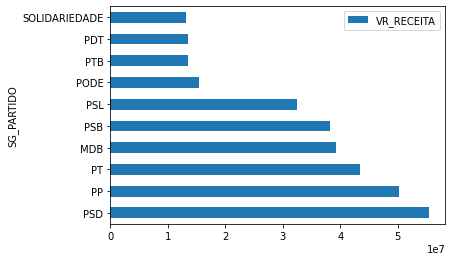

In [72]:
df_final[['SG_PARTIDO','VR_RECEITA']].groupby(by=['SG_PARTIDO']).sum().sort_values(by='VR_RECEITA',ascending=False).head(10).plot(kind='barh')

## Qual o valor médio das doações por tipo de doador?

Agora é sua vez! A partir dos comandos anteriores, faça uma nova consulta para descobrir a mediana de acordo com o tipo de doador.

In [73]:
df_final[['TIPO_DOADOR','VR_RECEITA']].groupby(by=['TIPO_DOADOR']).mean()

,VR_RECEITA
TIPO_DOADOR,
fisica,1864.978338
juridica,63687.471881


# Entreviste você mesmo

Escreva abaixo pelo menos outras três perguntas que podem ser feitas à base de dados. Escreva a pergunta como um comentário acima do código com a consulta em Python.

In [86]:
# quais são os 10 maiores doadores pessoas físicas

#df_final = df[df['TP_PRESTACAO_CONTAS'] == 'Final'].copy()
df_fisico = df_final[df_final['TIPO_DOADOR'] == 'fisica'].copy()

df_fisico[['SG_UF','TIPO_DOADOR','NR_CPF_CNPJ_DOADOR','VR_RECEITA']].groupby(by=['SG_UF','NR_CPF_CNPJ_DOADOR']).sum().sort_values(by='VR_RECEITA',ascending=False).head(10)

VR_RECEITA
SG_UF NR_CPF_CNPJ_DOADOR            
PE     92083536487            540000
MA    -1                      290384
       739251600              250000
BA     7116195572             200000
CE     399590315              200000
       2292653320             200000
       46604855368            150000
MA     485597683              100000
PE     69753270410            100000
CE     37748254087             78000

In [87]:
# quais são os 10 maiores doadores pessoas jurídicas


df_juridico = df_final[df_final['TIPO_DOADOR'] == 'juridica'].copy()

df_juridico[['SG_UF','TIPO_DOADOR','NR_CPF_CNPJ_DOADOR','VR_RECEITA']].groupby(by=['SG_UF','NR_CPF_CNPJ_DOADOR']).sum().sort_values(by='VR_RECEITA',ascending=False).head(10)

VR_RECEITA
SG_UF NR_CPF_CNPJ_DOADOR            
PI    887169000105          19317985
BA    676262000170          14857838
      13629827000100        11949500
PE    1421697000137         11686616
      1209414000198         10025920
PB    887169000105           7200683
PI    676213000138           6650211
CE    676262000170           6573666
PB    1209414000198          6473000
PE    676262000170           6006782

In [88]:
# Quais os 10 partidos que menos receberam?
df_final[['SG_PARTIDO','VR_RECEITA']].groupby(by=['SG_PARTIDO']).sum().sort_values(by='VR_RECEITA',ascending=True).head(10)

,VR_RECEITA
SG_PARTIDO,
PSTU,4200
PMB,65117
PMN,93731
PRTB,94798
NOVO,138588
PCB,146072
UP,281887
PSC,294951
PATRIOTA,946022
